## 聚类结果可视化

这里提供一个聚类结果的可视化例子，对KPI数据集中的29种KPI序列利用ROCKA算法进行聚类，并对聚类结果进行可视化，分别展示相同类别的KPI曲线及算法提取的基线，为后续分析和优化提供帮助。

In [1]:
import sys
import os

project_dir = os.path.dirname(os.getcwd())
sys.path.append(project_dir)

In [2]:
from example import ADdataset, Preprocessor
from adtk.visualization import plot
import pandas as pd

In [3]:
# 读取聚类结果
clustering_df = pd.read_csv(os.path.join(project_dir, "example/puad", "rocka.csv"))

In [4]:
# 数据路径
data_dir = os.path.join(project_dir, "data")
# 数据集
dataset = "KPI"

In [5]:
# 根据聚类结果将原始数据和基线分组
def get_clustering_data(datadir, dataset, cluster):
    data = ADdataset(root=datadir, dataset=dataset)
    num_cluster = cluster["cluster"].astype("int").max() + 1
    result = [[]for i in range(num_cluster)]
    for name, (train_df, train_label), (test_df, test_label) in data:
        cluster_id = cluster[cluster["kpi"]==name]["cluster"].values[0]
        centroid_name = clustering_df[clustering_df["centroid"]==cluster_id]["kpi"].values[0]
        train_pre = Preprocessor(train_df, train_label, normalize=True, fillna="interpolation", smooth=0.05)
        train_df, train_label, train_missing = train_pre.process()
        new_values, residuals = train_pre.extract_baseline(train_df["value"].values)
        train_df = train_df.reset_index(drop=True)
        df = train_df[train_df.shape[0]-new_values.shape[0]:].copy()
        df["baseline"] = new_values
        df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")
        df = df.set_index("timestamp")
        result[cluster_id].append([name, df, name==centroid_name])

    return result

In [6]:
result = get_clustering_data(data_dir, dataset, clustering_df)

按照聚类结果展示

cluster:  0
centroid:  0


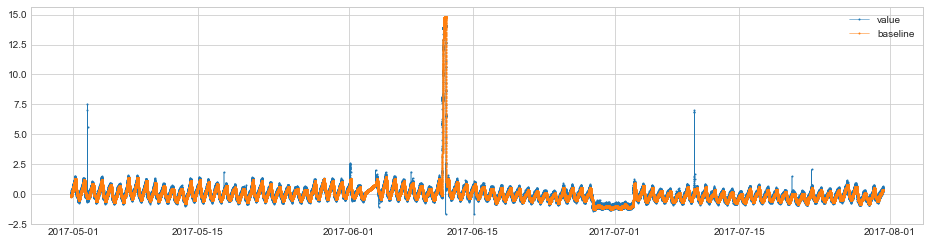

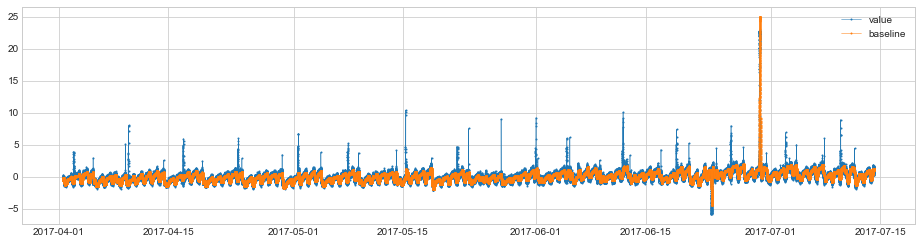

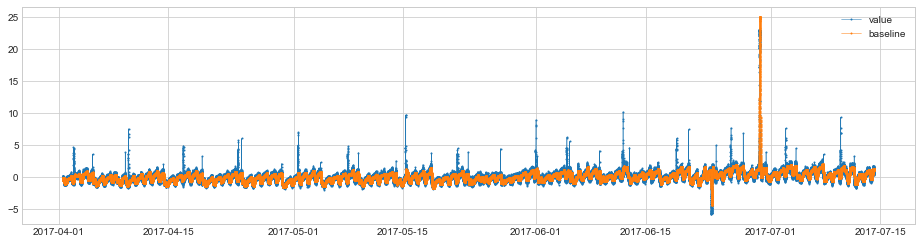

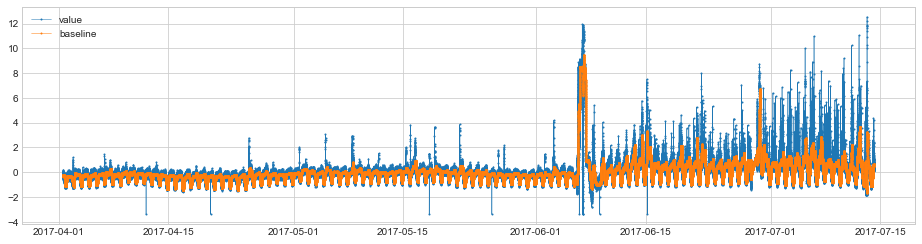

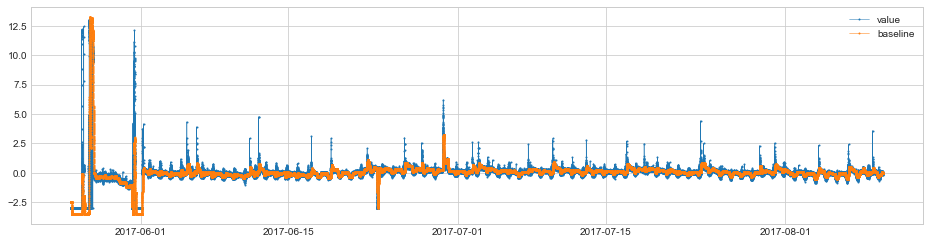

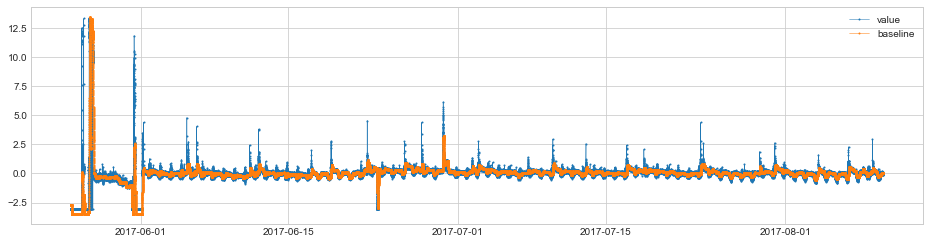

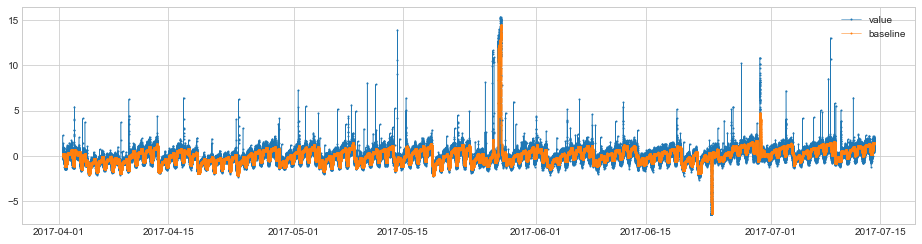

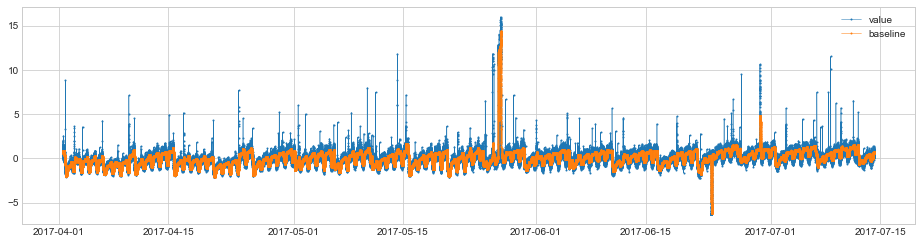

In [7]:
i = 0
print("cluster: ", i)
for j in range(len(result[i])):
    if result[i][j][2]:
         print("centroid: ", j)
    plot(result[i][j][1], curve_group="all")


cluster:  1
centroid:  4


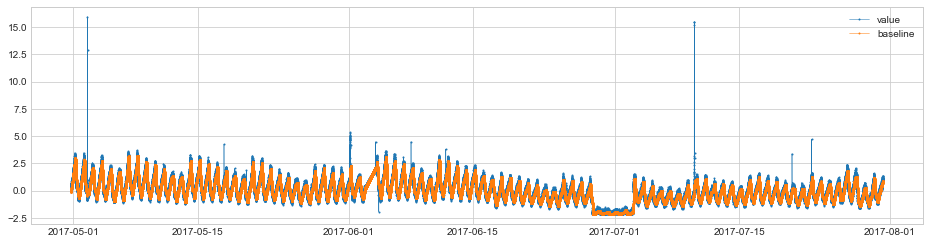

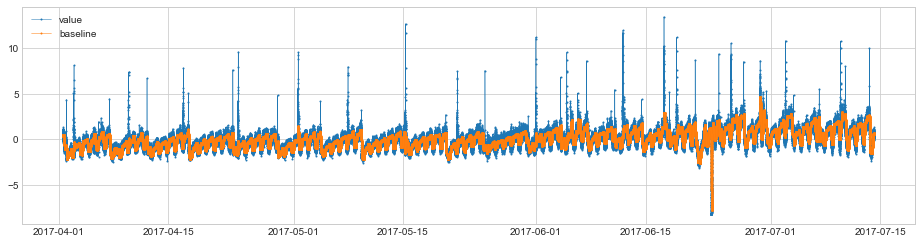

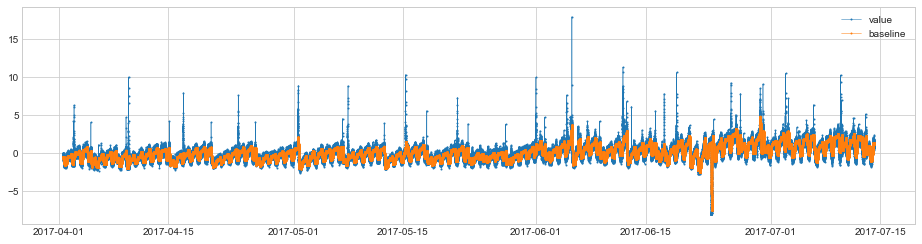

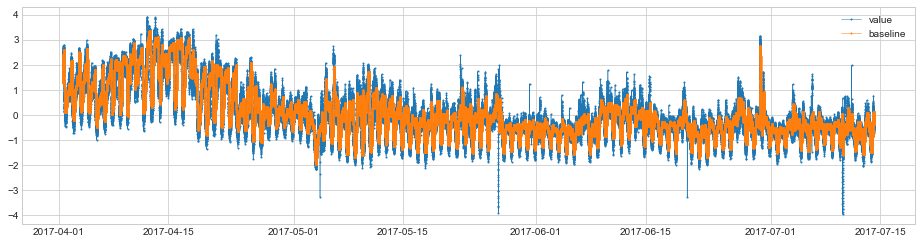

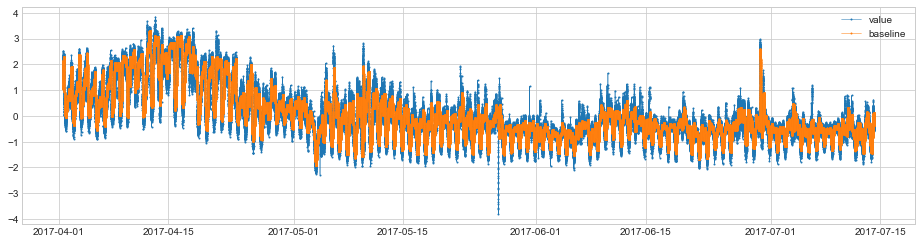

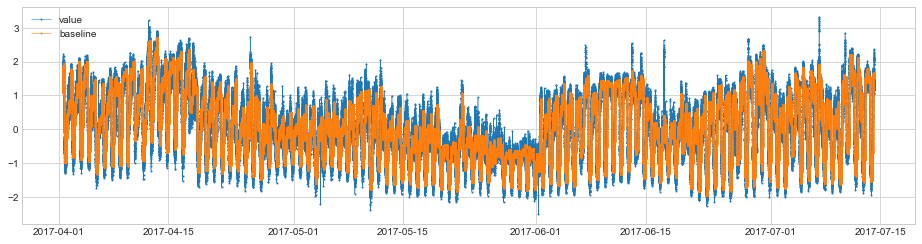

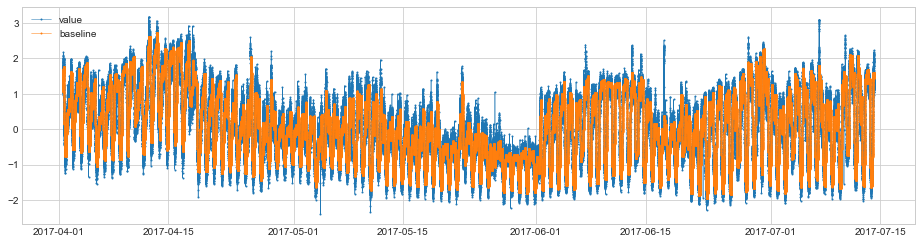

In [8]:
i = 1
print("cluster: ", i)
for j in range(len(result[i])):
    if result[i][j][2]:
         print("centroid: ", j)
    plot(result[i][j][1], curve_group="all")


cluster:  2
centroid:  0


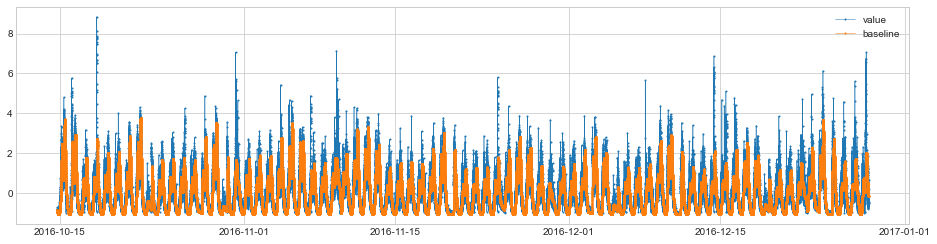

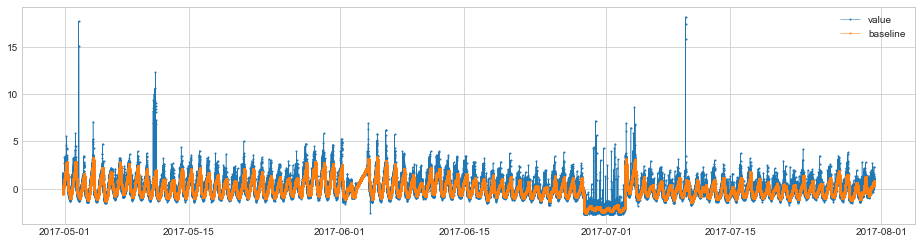

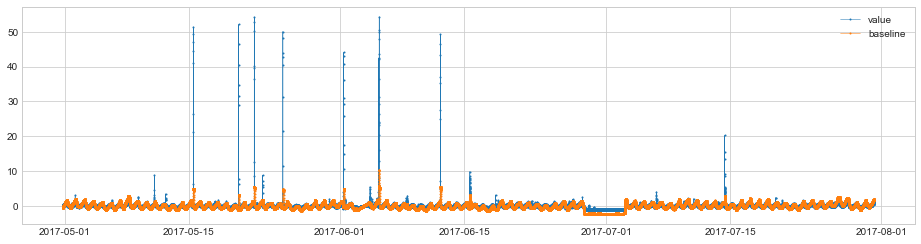

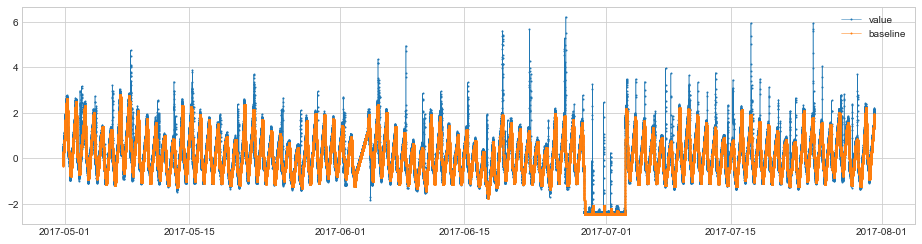

In [9]:
i = 2
print("cluster: ", i)
for j in range(len(result[i])):
    if result[i][j][2]:
         print("centroid: ", j)
    plot(result[i][j][1], curve_group="all")


cluster:  3
centroid:  0


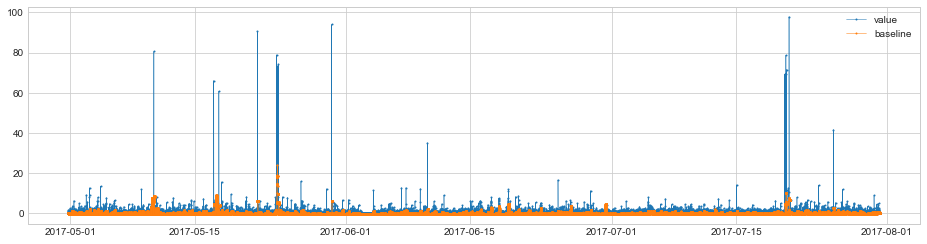

In [10]:
i = 3
print("cluster: ", i)
for j in range(len(result[i])):
    if result[i][j][2]:
         print("centroid: ", j)
    plot(result[i][j][1], curve_group="all")


cluster:  4
centroid:  0


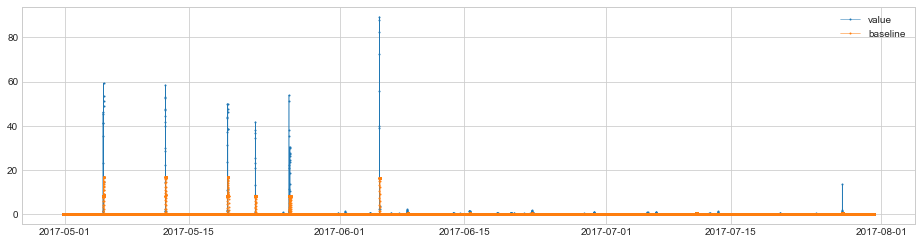

In [11]:
i = 4
print("cluster: ", i)
for j in range(len(result[i])):
    if result[i][j][2]:
         print("centroid: ", j)
    plot(result[i][j][1], curve_group="all")


cluster:  5
centroid:  0


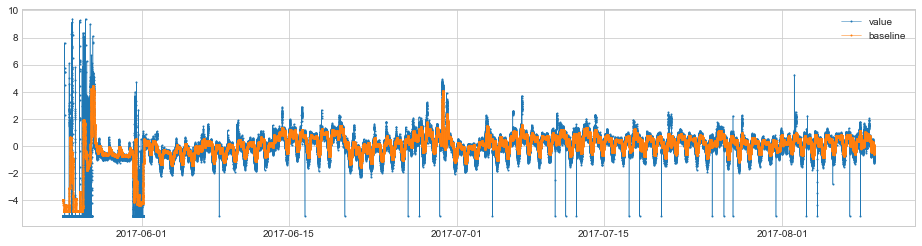

In [12]:
i = 5
print("cluster: ", i)
for j in range(len(result[i])):
    if result[i][j][2]:
         print("centroid: ", j)
    plot(result[i][j][1], curve_group="all")


cluster:  6
centroid:  4


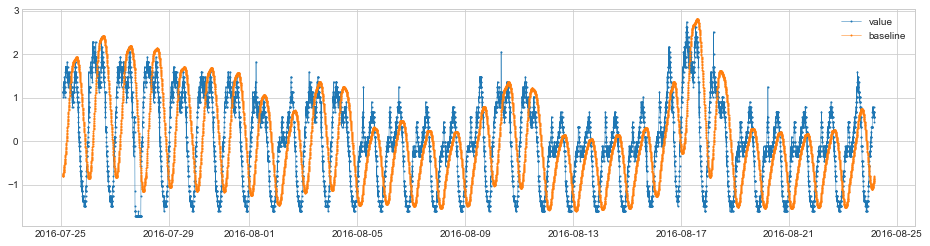

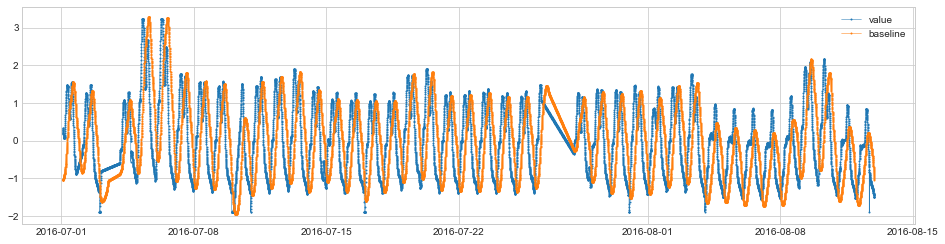

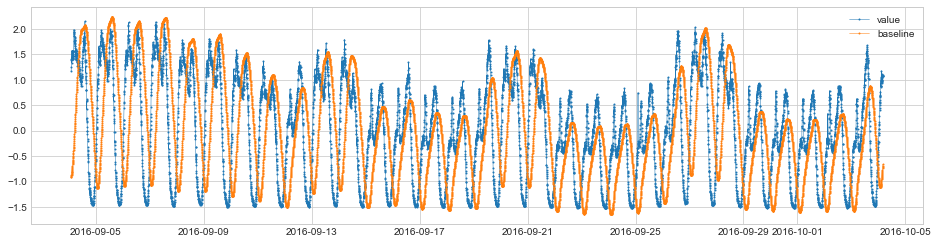

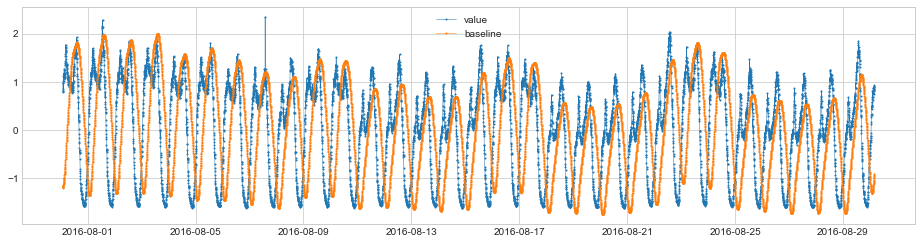

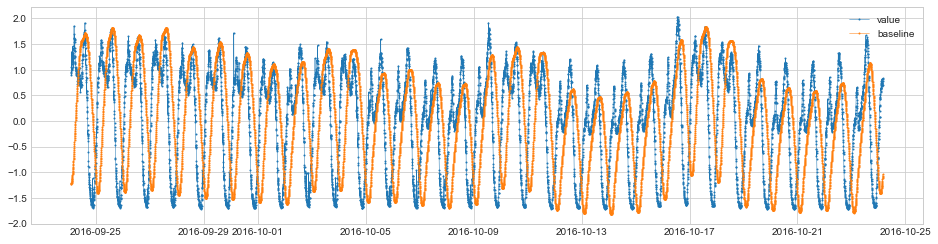

In [13]:
i = 6
print("cluster: ", i)
for j in range(len(result[i])):
    if result[i][j][2]:
         print("centroid: ", j)
    plot(result[i][j][1], curve_group="all")


cluster:  7
centroid:  0


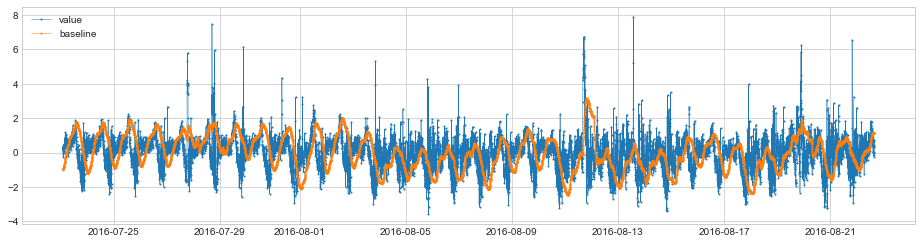

In [14]:
i = 7
print("cluster: ", i)
for j in range(len(result[i])):
    if result[i][j][2]:
         print("centroid: ", j)
    plot(result[i][j][1], curve_group="all")


cluster:  8
centroid:  0


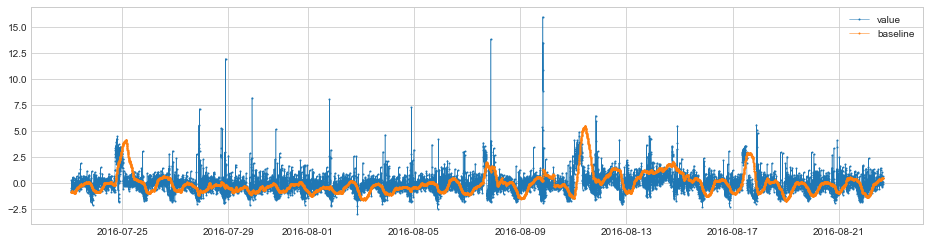

In [15]:
i = 8
print("cluster: ", i)
for j in range(len(result[i])):
    if result[i][j][2]:
         print("centroid: ", j)
    plot(result[i][j][1], curve_group="all")
